__전처리__

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [14]:
data = pd.read_csv('train.csv')

In [15]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
data['Initial'].head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Initial, dtype: object

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [20]:
data['Embarked'].fillna('S', inplace=True)

In [21]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [22]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

In [23]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

In [24]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

In [25]:
data['Sex'].replace(['male', 'female'],[0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

In [26]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],axis=1, inplace=True)

# SVM 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [28]:
train, test=train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## SVM Hyper-Parameters Tuning

In [11]:
from sklearn.model_selection import GridSearchCV
C=[0.2, 0.4, 0.6, 0.8, 1.0]
gamma = [0.1, 0.3, 0.5, 0.7, 0.9]
hyper = {'C':C, 'gamma': gamma}
gd = GridSearchCV(estimator = svm.SVC(probability=True), param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.get_params)

NameError: name 'X' is not defined

## 오차행렬, 정확도, 정밀도, 재현율, F1 score 알아보기

In [30]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score
from sklearn.preprocessing import Binarizer
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [31]:
pred = gd.predict(test_X)
get_clf_eval(test_Y, pred)

오차 행렬
[[154  11]
 [ 31  72]]
정확도: 0.8433, 정밀도: 0.8675, 재현율: 0.6990, F1:0.7742


정밀도: 0.8675 에 반해 재현율: 0.6990으로 현저히 낮음.

이를 보완하기위해 임계값 조정.

## 임곗값의 변경에 따른 정밀도-재현율 변화 곡선

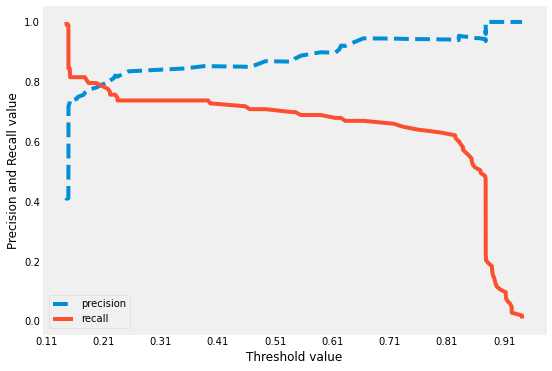

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(test_Y, gd.predict_proba(test_X)[:, 1] )

정밀도, 재현율 곡선을 그려봤을때 0.2 ~ 0.3 에서 비슷해짐.

In [33]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
pred_proba = gd.predict_proba(test_X)
get_eval_by_threshold(test_Y ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.1
오차 행렬
[[  0 165]
 [  0 103]]
정확도: 0.3843, 정밀도: 0.3843, 재현율: 1.0000, F1:0.5553
임곗값: 0.15
오차 행렬
[[133  32]
 [ 16  87]]
정확도: 0.8209, 정밀도: 0.7311, 재현율: 0.8447, F1:0.7838
임곗값: 0.2
오차 행렬
[[145  20]
 [ 23  80]]
정확도: 0.8396, 정밀도: 0.8000, 재현율: 0.7767, F1:0.7882
임곗값: 0.25
오차 행렬
[[150  15]
 [ 27  76]]
정확도: 0.8433, 정밀도: 0.8352, 재현율: 0.7379, F1:0.7835
임곗값: 0.3
오차 행렬
[[151  14]
 [ 27  76]]
정확도: 0.8470, 정밀도: 0.8444, 재현율: 0.7379, F1:0.7876
임곗값: 0.35
오차 행렬
[[152  13]
 [ 27  76]]
정확도: 0.8507, 정밀도: 0.8539, 재현율: 0.7379, F1:0.7917
임곗값: 0.4
오차 행렬
[[152  13]
 [ 29  74]]
정확도: 0.8433, 정밀도: 0.8506, 재현율: 0.7184, F1:0.7789


임계값이 0.35일때 F1 score가 0.7917로 가장 높고, 정밀도: 0.8539, 재현율: 0.7379로 높아진 재현율을 보임.

## 하이퍼 파라미터 시각화

In [34]:
df = pd.DataFrame(gd.cv_results_['mean_test_score'].reshape([5,-1]))
df.columns = hyper['C']
df.index = hyper['gamma']
df.index.name = 'C'
df.columns.name = 'gamma'
df

gamma,0.2,0.4,0.6,0.8,1.0
C,,,,,
0.1,0.822648,0.823784,0.817036,0.808072,0.776637
0.3,0.826012,0.828259,0.815944,0.809202,0.795738
0.5,0.828259,0.826025,0.810326,0.804714,0.802473
0.7,0.828259,0.817061,0.809202,0.809208,0.804708
0.9,0.828259,0.813690,0.804727,0.809208,0.808085


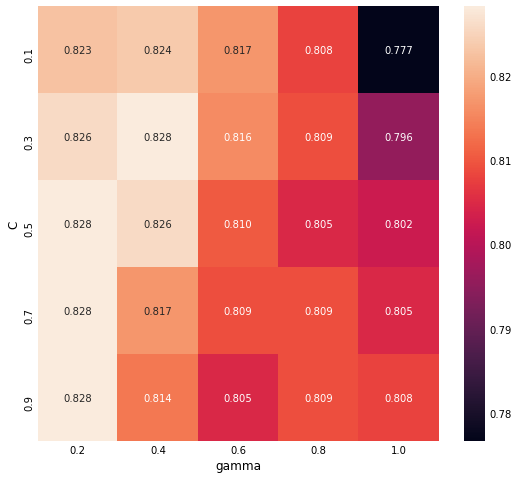

In [35]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap( df, annot = True, fmt = '.3f')
plt.show()

# Decision Tree Hyperparameter Tuning

- min_samples_split

:노드를 분할하기 위한 최소한의 샘플 데이터 수, default=2
- min_samples_leaf

:리프노드가 되기 위한 최소한의 샘플 데이터 수
- max_features

:고려할 최대 피처 개수, default=None
- max_depth

:트리 최대 깊이, default=None
- max_leaf_nodes

:리프노드의 최대 개수

## 하이퍼파라미터 튜닝을 전혀 하지 않은 모델

In [36]:
model=DecisionTreeClassifier(random_state=156)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
pred_proba4 = model.predict_proba(test_X)[:,1]
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## 평가 점수 구하는 함수_ 정확도, 재현율, F1점수, ROC-AUC

In [38]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print("  ")
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 임계값에 따른 평가점수 (default=0.5)
### (하이퍼파라미터 튜닝 전)

In [39]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba)
        print("  ")
        print("  ")
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
get_eval_by_threshold(test_Y, pred_proba4.reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[146  19]
 [ 33  70]]
  
정확도: 0.8060, 정밀도: 0.7865, 재현율: 0.6796, F1: 0.7292, AUC: 0.7865
  
  
임계값: 0.45
오차 행렬
[[148  17]
 [ 33  70]]
  
정확도: 0.8134, 정밀도: 0.8046, 재현율: 0.6796, F1: 0.7368, AUC: 0.7865
  
  
임계값: 0.5
오차 행렬
[[150  15]
 [ 37  66]]
  
정확도: 0.8060, 정밀도: 0.8148, 재현율: 0.6408, F1: 0.7174, AUC: 0.7865
  
  
임계값: 0.55
오차 행렬
[[150  15]
 [ 38  65]]
  
정확도: 0.8022, 정밀도: 0.8125, 재현율: 0.6311, F1: 0.7104, AUC: 0.7865
  
  
임계값: 0.6
오차 행렬
[[150  15]
 [ 38  65]]
  
정확도: 0.8022, 정밀도: 0.8125, 재현율: 0.6311, F1: 0.7104, AUC: 0.7865
  
  


##### < 가장 적절한 임계값  & 평가 점수 >_하이퍼파라미터 튜닝 전

임계값: 0.45

오차 행렬

[[148  17]

 [ 33  70]]
  
정확도: 0.8134, 정밀도: 0.8046, 재현율: 0.6796, F1: 0.7368, AUC: 0.7865

## 하이퍼파라미터 튜닝_교차검증 (Stratified 5-fold)

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

1) 최대한 많은 하이퍼 파라미터를 넣어보기

In [40]:
# 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 해주는 API
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[2, 4, 6, 8, 10, 12, 16, 20, 24],
    'min_samples_split':[18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
    'min_samples_leaf':[0, 1, 2],
    'max_leaf_nodes':[2, 4, 6],
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(test_X, test_Y)

print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.8211
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 18}


[Parallel(n_jobs=1)]: Done 4050 out of 4050 | elapsed:  1.0min finished


max_depth=2는 최적이라고 하기 힘들 것 같다.

2) max_leaf_nodes 제거 후 확인

In [41]:
params = {
    'max_depth':[2, 4, 6, 8, 10, 12, 16, 20, 24],
    'min_samples_split':[18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
    'min_samples_leaf':[0, 1, 2],
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(test_X, test_Y)

print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.8248
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 34}


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   19.9s finished


3) max_features를 넣어보기

In [42]:
params = {
    'max_depth':[2, 4, 6, 8, 10, 12, 16, 20, 24],
    'min_samples_split':[18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
    'min_samples_leaf':[0, 1, 2],
    'max_features': ['sqrt']
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(test_X, test_Y)

print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
GridSearchCV 최고 평균 정확도 수치: 0.8322
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 26}


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:   20.4s finished


4) min_samples_leaf제거

In [43]:
params = {
    'max_depth':[2, 4, 6, 8, 10, 12, 16, 20, 24],
    'min_samples_split':[18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
    'max_features': ['sqrt']
}

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(test_X, test_Y)

print("GridSearchCV 최고 평균 정확도 수치: {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits
GridSearchCV 최고 평균 정확도 수치: 0.8322
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 26}


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    6.6s finished


최고 평균 정확도 수치가 가장 커졌음

In [44]:
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(test_X)
best_pred_proba4 = best_model.predict_proba(test_X)[:,1]

thresholds = [0.35, 0.4, 0.45, 0.50, 0.6, 0.65]
get_eval_by_threshold(test_Y, best_pred_proba4.reshape(-1,1), thresholds)

임계값: 0.35
오차 행렬
[[126  39]
 [ 15  88]]
  
정확도: 0.7985, 정밀도: 0.6929, 재현율: 0.8544, F1: 0.7652, AUC: 0.8937
  
  
임계값: 0.4
오차 행렬
[[151  14]
 [ 30  73]]
  
정확도: 0.8358, 정밀도: 0.8391, 재현율: 0.7087, F1: 0.7684, AUC: 0.8937
  
  
임계값: 0.45
오차 행렬
[[151  14]
 [ 30  73]]
  
정확도: 0.8358, 정밀도: 0.8391, 재현율: 0.7087, F1: 0.7684, AUC: 0.8937
  
  
임계값: 0.5
오차 행렬
[[151  14]
 [ 30  73]]
  
정확도: 0.8358, 정밀도: 0.8391, 재현율: 0.7087, F1: 0.7684, AUC: 0.8937
  
  
임계값: 0.6
오차 행렬
[[159   6]
 [ 41  62]]
  
정확도: 0.8246, 정밀도: 0.9118, 재현율: 0.6019, F1: 0.7251, AUC: 0.8937
  
  
임계값: 0.65
오차 행렬
[[159   6]
 [ 41  62]]
  
정확도: 0.8246, 정밀도: 0.9118, 재현율: 0.6019, F1: 0.7251, AUC: 0.8937
  
  


## 하이퍼 파라미터 시각화

In [45]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_split=1e-07, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
y_pred = dt.predict(test_X)

In [46]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7749338040600177

### max_depth

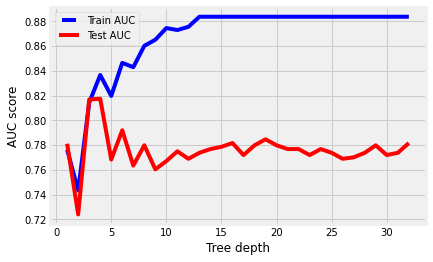

In [47]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(train_X, train_Y)
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_Y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()#### min_samples_split

### min_samples_split

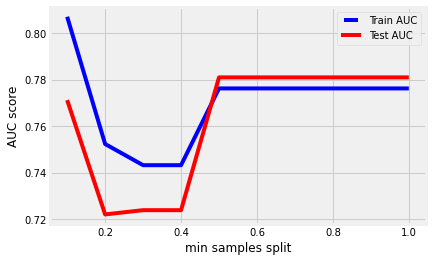

In [48]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(train_X, train_Y)
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_Y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

### min_samples_leaf

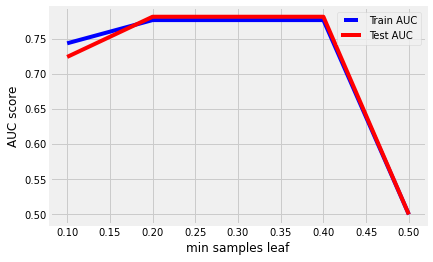

In [49]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(train_X, train_Y)
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_Y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

### max_features

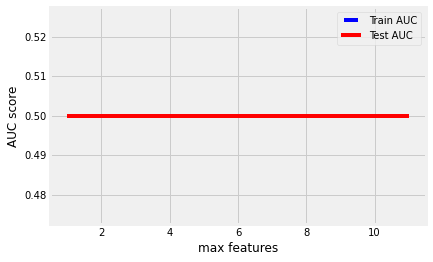

In [61]:
max_features = list(range(1,train.shape[1]+1))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(train_X, train_Y)
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_Y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

# K-Nearest Neighbours(KNN)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [30]:
train, test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

In [31]:
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

__Hyperparameter Tuning: Random vs. Grid__

<https://shwksl101.github.io/ml/dl/2019/01/30/Hyper_parameter_optimization.html>

## KNN(K-Nearest Neighbours)

- KNN: 새로운 데이터를 입력 받았을 때 가장 가까이 있는 데이터들이 무엇인지를 기준으로 새로운 데이터의 분류를 정하는 분류 알고리즘. 

<https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html>

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)[source]

__<하이퍼파라미터 종류>__
- __n_neighbors__: K. 거리가 가까운 데이터 k개를 기준으로 데이터 분류
    - 너무 작으면 overfitting될 수 있음
    - 너무 크면 underfitting될 수 있음
    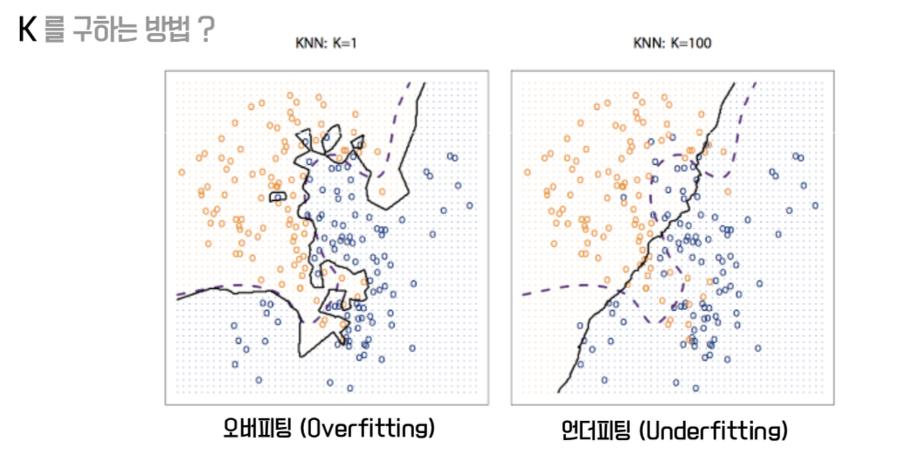


- __p__: 거리를 재는 방법
    - p=1: 맨하탄 거리 (절댓값)
        - 각 좌표의 차를 모두 더한 것
        - 맨해튼 거리는 항상 유클리드 거리보다 크거나 같다는 성질이 있음.
    - p=2: 유클라디안 거리 (제곱루트) - default
    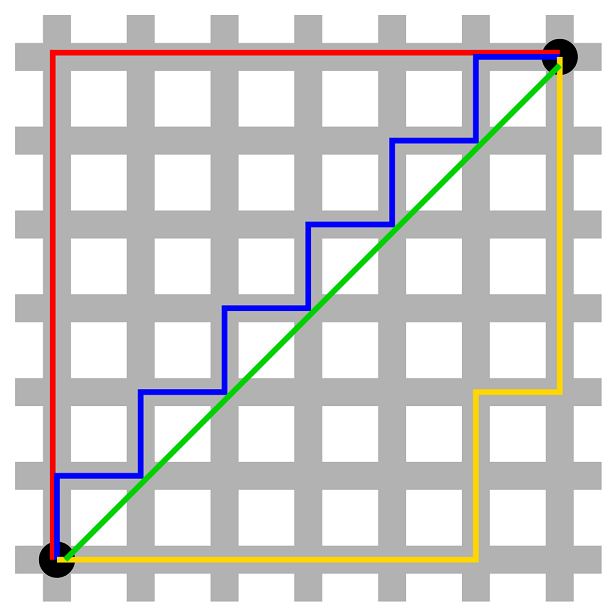

In [32]:
## 평가지표 함수 정의
def get_clf_eval(test_Y, pred=None, pred_proba=None):
    from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score
    confusion = confusion_matrix( test_Y, pred)
    accuracy = accuracy_score(test_Y , pred)
    precision = precision_score(test_Y , pred)
    recall = recall_score(test_Y , pred)
    f1 = f1_score(test_Y,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(test_Y, pred_proba)
    print()
    print('오차 행렬')
    print(pd.DataFrame(confusion))
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [33]:
## print 서식 지정
PURPLE = '\033[95m'
CYAN = '\033[96m'
DARKCYAN = '\033[36m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

### default값으로 모델링

In [34]:
model = KNeighborsClassifier() # K=5
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
pred_proba = model.predict_proba(test_X)[:, 1]
print(BOLD, 'default 하이퍼파라미터:\n', END, model.get_params())

get_clf_eval(test_Y, pred=prediction, pred_proba=pred_proba)

 default 하이퍼파라미터:
  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

오차 행렬
     0   1
0  146  19
1   26  77
정확도: 0.8321, 정밀도: 0.8021, 재현율: 0.7476, F1: 0.7739, AUC:0.8570


- 오차행렬 => 생존자 예측보다 사망자 예측을 더 잘함
- 정밀도 = 77/(19+77)
- 재현율 = 77/(26+77)


### GridSearch(n_neighbors, p 튜닝) + scoring metrics 여러개 + 교차검증

In [35]:
from sklearn.model_selection import GridSearchCV

n_neighbors = list(range(1,20))
p=[1,2]

hyper = {'n_neighbors':n_neighbors, 'p':p}

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

list_of_df = []
for i in metrics:
    gd = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=hyper, verbose=0, scoring=i) # cv=5
    gd.fit(train_X, train_Y)
    scores_df = pd.DataFrame(gd.cv_results_)
    scores_df = scores_df[['params', 'mean_test_score', 'rank_test_score']]
    scores_df['metrics'] = i
    scores_df
    list_of_df.append(scores_df)
    print('best_params', gd.best_params_)
    print('최적의 하이퍼파라미터로 계산한 test',i,':', round(float(gd.score(test_X,test_Y)),4),'\n')

best_params {'n_neighbors': 16, 'p': 1}
최적의 하이퍼파라미터로 계산한 test accuracy : 0.8097 

best_params {'n_neighbors': 2, 'p': 1}
최적의 하이퍼파라미터로 계산한 test precision : 0.8194 

best_params {'n_neighbors': 15, 'p': 2}
최적의 하이퍼파라미터로 계산한 test recall : 0.7282 

best_params {'n_neighbors': 16, 'p': 1}
최적의 하이퍼파라미터로 계산한 test f1 : 0.7213 

best_params {'n_neighbors': 16, 'p': 1}
최적의 하이퍼파라미터로 계산한 test roc_auc : 0.8718 



- 평가지표에 따라 하이퍼파라미터 약간씩 다름.
- accuray의 경우, default 하이퍼파라미터인 n_neighbors=5, p=2보다 test 정확도 낮은데, 아마 train 정확도는 더 높은데 test 정확도는 더 낮은 것 같음...?
- 대체로는 n_neighbors=16, p=1의 조합 가장 많음

In [36]:
knn_GridSearch_df = pd.concat(list_of_df)
knn_GridSearch_df = knn_GridSearch_df.reset_index().iloc[:,1:]
knn_GridSearch_df = pd.concat([knn_GridSearch_df, knn_GridSearch_df['params'].apply(pd.Series).reset_index().iloc[:,1:]], axis=1).drop(columns='params')
knn_GridSearch_df

,mean_test_score,rank_test_score,metrics,n_neighbors,p
0,0.743174,37,accuracy,1,1
1,0.743174,37,accuracy,1,2
2,0.793019,8,accuracy,2,1
3,0.791406,12,accuracy,2,2
4,0.791419,11,accuracy,3,1
...,...,...,...,...,...
185,0.858347,15,roc_auc,17,2
186,0.863461,6,roc_auc,18,1
187,0.855352,21,roc_auc,18,2
188,0.858750,14,roc_auc,19,1


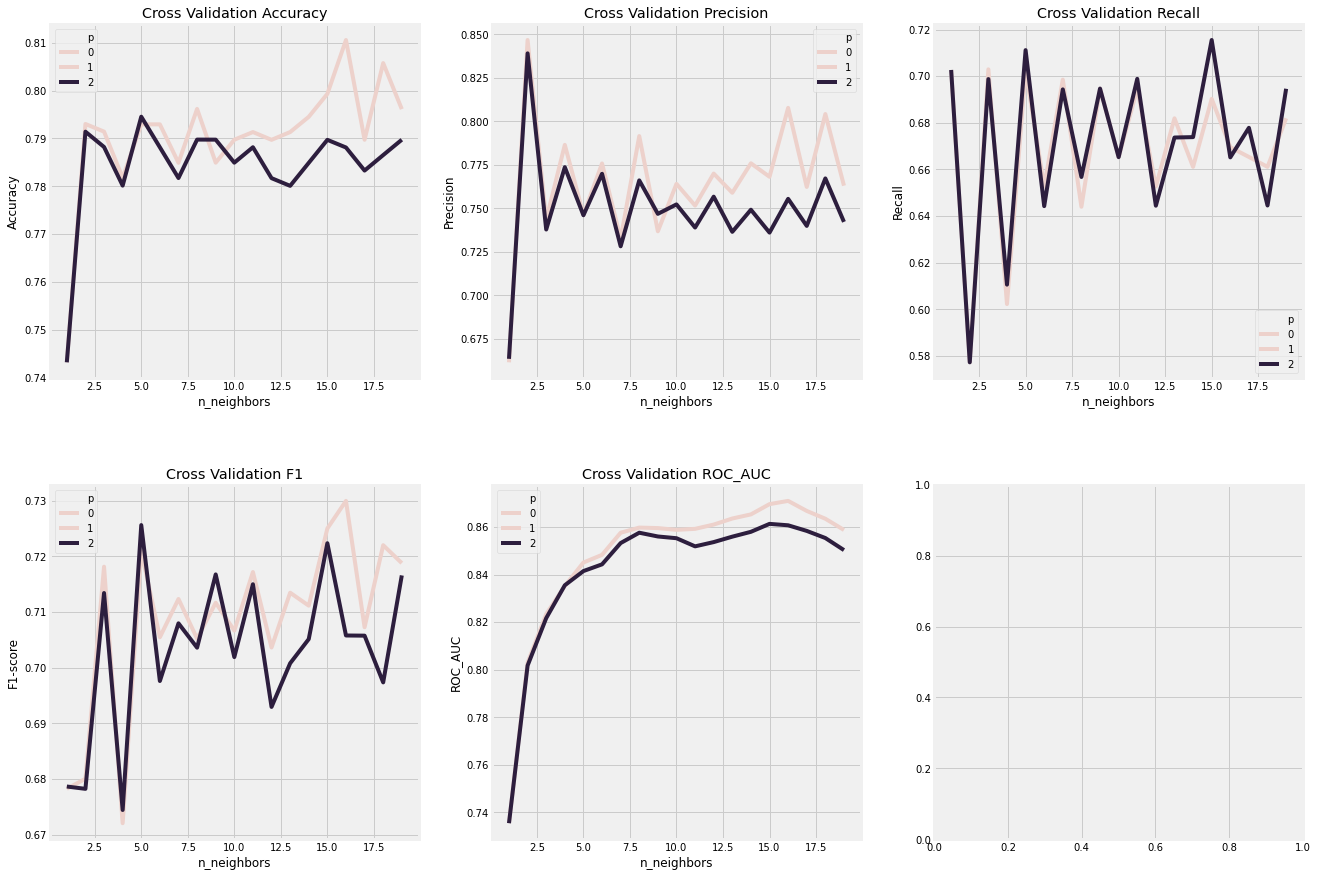

In [37]:
from  matplotlib.ticker import FuncFormatter

f,ax=plt.subplots(2,3,figsize=(20,15))

sns.lineplot('n_neighbors', 'mean_test_score',data=knn_GridSearch_df[knn_GridSearch_df.metrics=='accuracy'],ax=ax[0,0], hue='p')
ax[0,0].set_title('Cross Validation Accuracy')
ax[0,0].set_ylabel('Accuracy')

sns.lineplot('n_neighbors', 'mean_test_score',data=knn_GridSearch_df[knn_GridSearch_df.metrics=='precision'],ax=ax[0,1], hue='p')
ax[0,1].set_title('Cross Validation Precision')
ax[0,1].set_ylabel('Precision')

sns.lineplot('n_neighbors', 'mean_test_score',data=knn_GridSearch_df[knn_GridSearch_df.metrics=='recall'],ax=ax[0,2], hue='p')
ax[0,2].set_title('Cross Validation Recall')
ax[0,2].set_ylabel('Recall')

sns.lineplot('n_neighbors', 'mean_test_score',data=knn_GridSearch_df[knn_GridSearch_df.metrics=='f1'],ax=ax[1,0], hue='p')
ax[1,0].set_title('Cross Validation F1')
ax[1,0].set_ylabel('F1-score')

sns.lineplot('n_neighbors', 'mean_test_score',data=knn_GridSearch_df[knn_GridSearch_df.metrics=='roc_auc'],ax=ax[1,1], hue='p')
ax[1,1].set_title('Cross Validation ROC_AUC')
ax[1,1].set_ylabel('ROC_AUC')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

- accuracy: p=1(맨하튼거리)일때 더 높음.  n_neighbors는 큰 차이 없는듯
- 정밀도:  p=1(맨하튼거리)일때 더 높음.  n_neighbors=2일 때 가장 높음
- 재현율: 거리 측정 지표 차이 없음. n_neighbors 홀수일 때 높아짐
- f1-score: 정밀도 재현율 모두 고려한 지표. 
- AUC 값: p=1일 때 더 높은듯. n_neighbors는 많을수록 올라감. 

__타이타닉 데이터에서는 생존자를 생존자로, 사망자를 사망자로 잘 예측하는 게 중요하므로 정확도 지표에 집중 (kaggle 평가도 정확도 기준)__


# Random Forests

In [45]:
from sklearn.ensemble import RandomForestClassifier        
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn.metrics import confusion_matrix         
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score 

In [46]:
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## Random Forests

In [47]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [48]:
rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(train_X, train_Y)
pred = rf_clf.predict(test_X)
pred_proba = rf_clf.predict_proba(test_X)[:,1]
get_clf_eval(test_Y, pred, pred_proba)

오차 행렬
[[151  14]
 [ 36  67]]
정확도: 0.8134, 정밀도: 0.8272, 재현율: 0.6505, F1: 0.7283, AUC:0.8472


### 하이퍼 파라미터 튜닝

In [49]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_X, train_Y)
pred = rf_clf.predict(test_X)
print('랜덤 포레스트의 정확도 : ', metrics.accuracy_score(test_Y, pred))

랜덤 포레스트의 정확도 :  0.8134328358208955


#### max_depth를 바꿔가며 최적 하이퍼 파라미터 구해보기

In [50]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(train_X ,train_Y)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.8154
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}


In [51]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(train_X ,train_Y)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.8122
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6}


In [52]:
cv_results_rf = pd.DataFrame(grid_cv.cv_results_)
cv_results_rf[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.812221
1,8,0.805819
2,10,0.805811
3,12,0.800988
4,16,0.797783
5,20,0.797783
6,24,0.797783


max_depth가 10일 때 가장 높은 정확도 81.54%

#### n_estimators, max_depth, min_samples_leaf, min_samples_split를 바꿔가며 최적 하이퍼 파라미터 구해보기

In [53]:
params = {
    'n_estimators':[10, 100, 200, 300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(train_X, train_Y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_estimator_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=0)
최고 예측 정확도: 0.8219


max_depth=8, min_samples_leaf=12, min_samples_split=8, n_estimators=200일 때 가장 높은 정확도, 82.19%

In [54]:
cv_results_rf = pd.DataFrame(grid_cv.cv_results_)
cv_results_rf[['param_n_estimators','param_max_depth','param_min_samples_leaf','param_min_samples_split','mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(10)

,param_n_estimators,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
86,200,10,12,8,0.821852
126,200,12,12,16,0.821852
58,200,8,12,20,0.821852
54,200,8,12,16,0.821852
50,200,8,12,8,0.821852
130,200,12,12,20,0.821852
90,200,10,12,16,0.821852
122,200,12,12,8,0.821852
94,200,10,12,20,0.821852
95,300,10,12,20,0.820250


In [55]:
rf_clf1 = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=12, min_samples_split=8, random_state=0)
rf_clf1.fit(train_X, train_Y)
pred = rf_clf1.predict(test_X)
print('랜덤 포레스트의 정확도: {0:.4f}'.format(accuracy_score(test_Y, pred)))

랜덤 포레스트의 정확도: 0.8246


#### Confusion Matrix

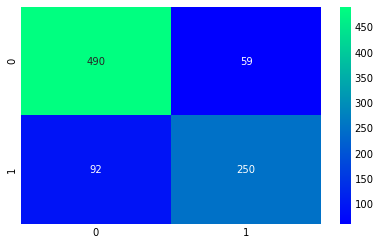

In [56]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 


ada=RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=12, min_samples_split=8, random_state=0)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

#### 각 파라미터 별로 정확도 구해보기

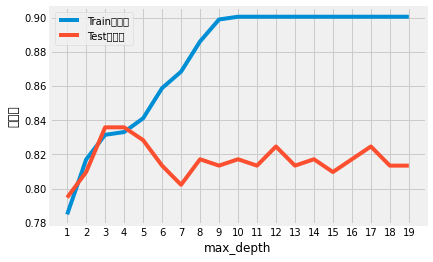

In [57]:
max_depth_list = range(1, 20)
train_acc_list = []
test_acc_list = []

for max_depth in max_depth_list:
    rf_clf2 = RandomForestClassifier(max_depth = max_depth)
    rf_clf2.fit(train_X, train_Y)
    
    pred_train = rf_clf2.predict(train_X)
    pred_test = rf_clf2.predict(test_X)
    
    train_acc_list.append(accuracy_score(train_Y, pred_train))
    test_acc_list.append(accuracy_score(test_Y, pred_test))
    
d = {"max_depth":max_depth_list, "Train정확도":train_acc_list, "Test정확도":test_acc_list}
acc_df = pd.DataFrame(d)

acc_df.set_index('max_depth').plot()
plt.xticks(max_depth_list)
plt.ylabel('정확도')
plt.show()

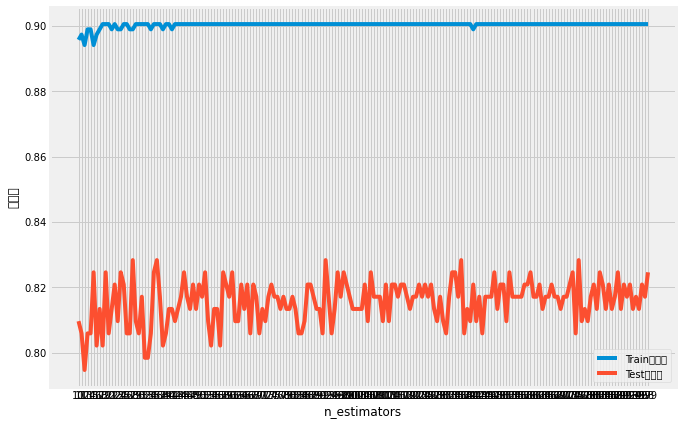

In [58]:
n_estimators_list = range(10, 200)
train_acc_list = []
test_acc_list = []

for n_estimators in n_estimators_list:
    rf_clf2 = RandomForestClassifier(n_estimators = n_estimators)
    rf_clf2.fit(train_X, train_Y)
    
    pred_train = rf_clf2.predict(train_X)
    pred_test = rf_clf2.predict(test_X)
    
    train_acc_list.append(accuracy_score(train_Y, pred_train))
    test_acc_list.append(accuracy_score(test_Y, pred_test))
    
d = {"n_estimators":n_estimators_list, "Train정확도":train_acc_list, "Test정확도":test_acc_list}
acc_df = pd.DataFrame(d)

acc_df.set_index('n_estimators').plot(figsize=(10,7))
plt.xticks(n_estimators_list)
plt.ylabel('정확도')
plt.show()

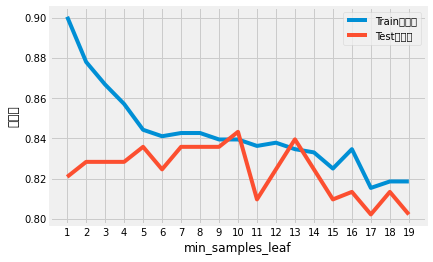

In [59]:
min_samples_leaf_list = range(1, 20)
train_acc_list = []
test_acc_list = []

for min_samples_leaf in min_samples_leaf_list:
    rf_clf2 = RandomForestClassifier(min_samples_leaf = min_samples_leaf)
    rf_clf2.fit(train_X, train_Y)
    
    pred_train = rf_clf2.predict(train_X)
    pred_test = rf_clf2.predict(test_X)
    
    train_acc_list.append(accuracy_score(train_Y, pred_train))
    test_acc_list.append(accuracy_score(test_Y, pred_test))
    
d = {"min_samples_leaf":min_samples_leaf_list, "Train정확도":train_acc_list, "Test정확도":test_acc_list}
acc_df = pd.DataFrame(d)

acc_df.set_index('min_samples_leaf').plot()
plt.xticks(min_samples_leaf_list)
plt.ylabel('정확도')
plt.show()

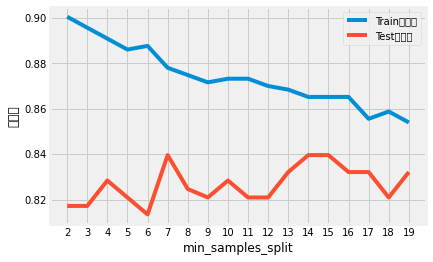

In [60]:
min_samples_split_list = range(2, 20)
train_acc_list = []
test_acc_list = []

for min_samples_split in min_samples_split_list:
    rf_clf2 = RandomForestClassifier(min_samples_split = min_samples_split)
    rf_clf2.fit(train_X, train_Y)
    
    pred_train = rf_clf2.predict(train_X)
    pred_test = rf_clf2.predict(test_X)
    
    train_acc_list.append(accuracy_score(train_Y, pred_train))
    test_acc_list.append(accuracy_score(test_Y, pred_test))

d = {"min_samples_split":min_samples_split_list, "Train정확도":train_acc_list, "Test정확도":test_acc_list}
acc_df = pd.DataFrame(d)

acc_df.set_index('min_samples_split').plot()
plt.xticks(min_samples_split_list)
plt.ylabel('정확도')
plt.show()